# **Семинар 9. Линейная регрессия**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

### Термины регрессия

**Линейная регрессия** — модель зависимости одной (целевой переменной) переменной от другой или нескольких других переменных (независимых переменных)

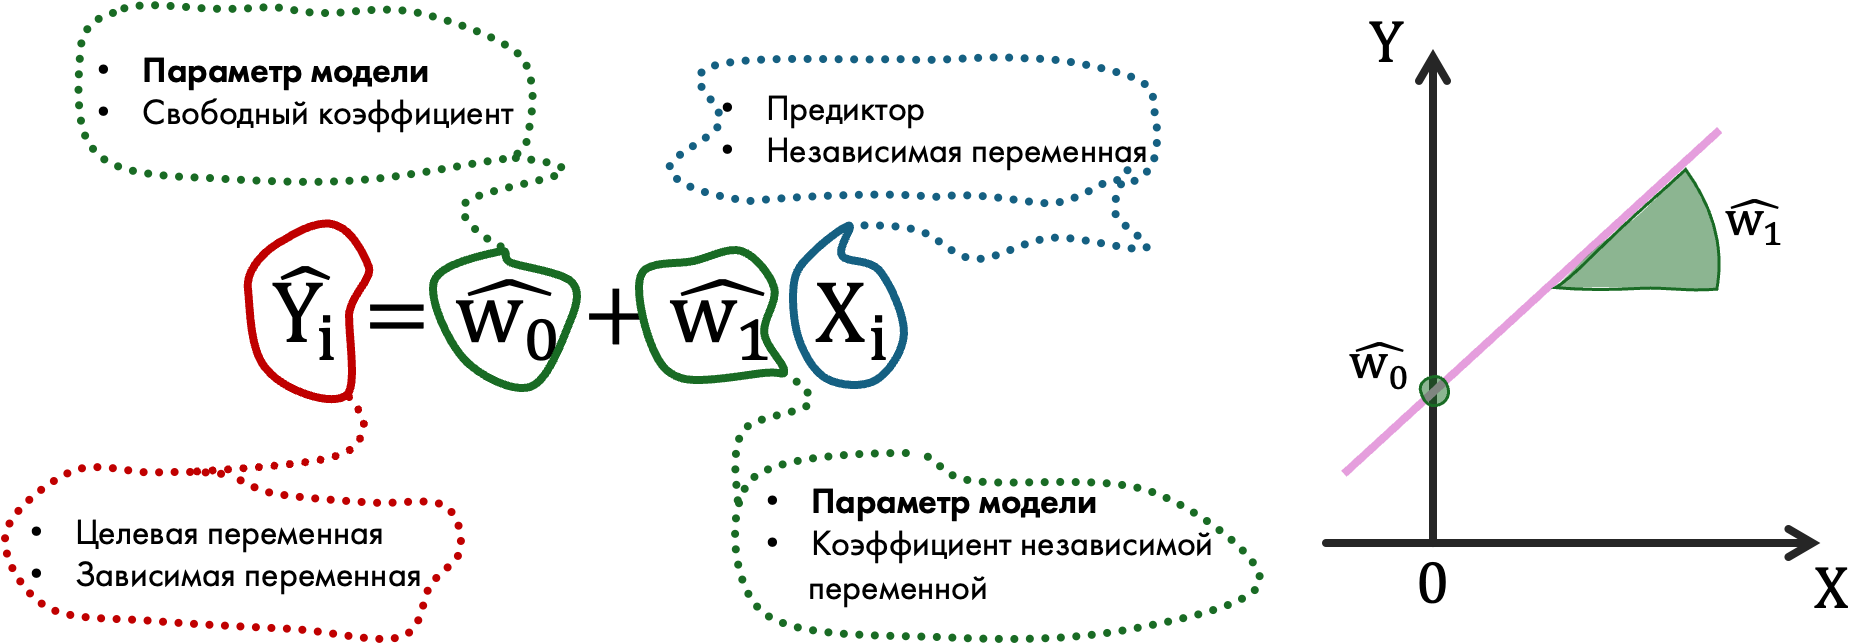

+ **Целевая переменная** - количественная
+ **Независимая переменная** (предиктор) - количественная или категориальная (но закодированная числами)

**Виды регрессий:**

1. *Однофакторная* - одна независимая переменная. Можно визуализировать зависимость между целевой и независимой переменными на обычном графике рассеяния

$$Y = w_0 + w_1 \cdot X$$


2. *Многофакторная* - несколько независимых переменных. При $n>2$ (более, чем двух независимых переменных) зависимость всех независимых переменных с целевой визуализировать нельзя

$$Y = w_0 + w_1\cdot X_1 + w_2 \cdot X_2 + \cdots w_n \cdot X_n$$

## [**A10**](https://edu.hse.ru/mod/quiz/view.php?id=1220249)

Была построена модель, которая предсказывает, как расстояние до метро влияет на стоимость квартиры:

$$Цена=\text{Расстояние до метро} \cdot a + b$$


Соотнесите термины регрессии и составляющие модели:

| Составляющие | Термины |
|----------|----------|
| **Квартира**   | Свободный коэффициент   |
| **Цена**    | Наблюдение   |
| **Расстояние до метро**    | Зависимая переменная   |
| **a**   | Независимая переменная   |
| **b**   | Коэффициент независимой переменной   |

## Практика

Работаем с данными о ресторанах:

- `Number_of_Customers` - среднее количество посетителей за день
- `Menu_Price` - средняя цена блюда ($)
- `Marketing_Spend`	- затраты на рекламу
- `Cuisine_Type` - кухня
- `Average_Customer_Spending` - затраты на привлечение клиента ($)
- `Promotions` - проводились ли рекламные акции (0/1)
- `Reviews` - количество отзывов на ресторан
- `Monthly_Revenue` - месячная прибыль ресторана ($)

In [128]:
# выполните ячейку, если
# !pip install statsmodels -q

In [129]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/Restaurants.csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


Перед тем как строить модель, данные нужно подготовить: 
- Очистить от выбросов
- Заменить пропуски
- Закодировать категориальные переменные (в виде цифр)

У нас данные уже подготовленные, поэтому этого делать не нужно.

### Обучение модели

**Обучить модель** - найти (оценить) значения параметров модели

Обучение линейной регрессии происходит с помощью **метода наименьших квадратов** (МНК, OLS):
- Суть метода - *минизировать расстояние* от каждого наблюдения до нашей модели.
- Минимизация происходит путем *поиска наилучших параметров (весов) модели*, при которых расстояния от каждого наблюдения до нашей модели будет наименьшим.

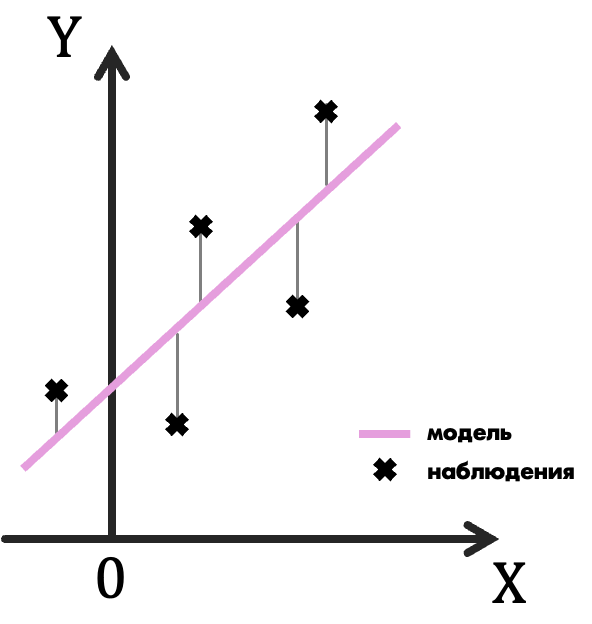

**Синтаксис обучения линейной регрессии:**

```python
import statsmodels.api as sm

X = sm.add_constant(observations)
Y = target                        
model = sm.OLS(Y, X).fit()
```

- `sm.add_constant` - добавляет столбец с единицами. Это необходимо для оценки **свободного коэффициента** ($w_0$)
- `observations` - матрица (~таблица), где по строкам - наблюдения, по столбцам - признаки. Все значения - числовые. Модель будет стараться подобрать наилучшие параметры (веса) для каждого из признаков в нашей таблице наблюдений.
- `target` - целевая переменная. Хотим ее предсказывать на основе только наблюдений
- `OLS(Y, X)` - инициализировать модель линейной регрессии, где $Y$ - независимая переменная для $n$ наблюдений, а $X$ - зависимые переменные ($n$ наблюдений и $k$ признаков). При вызове `.fit()` находим лучшие параметры линейной регрессии методом OLS

**Пример**

Хотим построить модель линейной регрессии, которая показывает как количество посетителей (`Number_of_Customers`) и проведение рекламных акций (`Promotions`) оказывает влияение на прибыль ресторана (`Monthly_Revenue`)

$$\text{Monthly\_Revenue} = w_0 + w_1 \cdot \text{Number\_of\_Customers} + w_2 \cdot \text{Promotions}$$

In [7]:
# библиотека для обучения моделей
import statsmodels.api as sm

In [11]:
# независимая переменная (предиктор) [кол-во наблюдений, кол-во признаков]
X = sm.add_constant(df[['Number_of_Customers', 'Promotions']])

# целевая/зависимая переменная (таргет) [кол-во наблюдений]
Y = df['Monthly_Revenue']

X.shape, Y.shape

((1000, 3), (1000,))

In [15]:
# обучаем модель (находим параметры w)
# вывода в ячейке не будет
model = sm.OLS(Y, X).fit()

In [17]:
model.params

const                  114.784988
Number_of_Customers      2.945921
Promotions              -6.022084
dtype: float64

### Параметры модели

`model.params` - показывает все параметры модели (можно посмотреть как у обученной модели после метода `.fit()`, так и необученной до вызова `fit()`).
- **const** - свободный коэффициент ($w_0$). Если его нет - ` sm.add_constant` не был вызван.
- параметр для каждого признака из матрицы наблюдений ($X$) 

In [19]:
# const - свободный
model.params

const                  114.784988
Number_of_Customers      2.945921
Promotions              -6.022084
dtype: float64

То есть наша линейная регрессия выглядит следующим образом:

$$\text{Monthly\_Revenue} = 114.78 + 2.95 \times \text{Number\_of\_Customers} - 6.02 \times \text{Promotions}$$

1. $𝑤_0$ - если в ресторане нет посетителей ($\text{Number\_of\_Customers} = 0$) и ресторан не проводил рекламных акций ($\text{Promotions} = 0$), то его прибыль ($\text{Monthly\_Revenue}$) будет равна $114.78 \$$
2. $𝑤_1$ - при увеличении количества посетителей ($\text{Number\_of\_Customers}$) на одного, прибыль ($\text{Monthly\_Revenue}$) **увеличится** на $2.95\$$
3. $𝑤_2$ - если ресторан проведет рекламную акцию ($\text{Promotions} = 1$), это **снизит** его прибыль ($\text{Monthly\_Revenue}$) на $6.02 \$$

**Интерпретация параметров**

$$ Y = w_0 + w_1×X_1 - w_2×X_2 $$

1. $𝑤_0$
    - Если все предикты равны 0, то $Y$ равен $𝑤_0$
    - Не всегда можно интепретировать(Пример: $Вес = w_0 + w_1 \cdot Рост$)

2. $𝑤_1$
    - $X_1$ - количественная: при увеличении $X_1$ на 1 $Y$ увеличится на $𝑤_1$
    - $X_1$ - бинарная (1/0): если $X_1$ равен 1, то $Y$ увеличится на $𝑤_1$

3. $𝑤_2$
    - $X_2$ количественная: при увеличении $X_2$ на 1 $Y$ снизится на $𝑤_2$
    - $X_2$ бинарная (1/0): если $X_2$ равен 1, то $Y$ снизится на $𝑤_2$

## [**A12**](https://edu.hse.ru/mod/quiz/view.php?id=1220252)

Мы решаем задачу определения зарплаты, которую предложат кандидату, по описанию вакансии. У нас четыре признака: A, B, C и D. Каждый из них равен нулю или единице в зависимости от наличия в описании того или иного слова. Для признака A это слово “старший”; для признака B — “выпускник”, для C — “программирование”, для D — “Москва”. Модель вычисляет зарплату в рублях по формуле:

 $$Зарплата=30000+20000𝐴−10000𝐵+20000𝐶+10000𝐷$$

 Выберите верное утверждение об этой модели.



- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 30 тысяч рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 0 рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 20 тысяч рублей.


- Если в описании вакансии нет слов “старший”, “выпускник”, “программирование” и “Москва”, то предсказывается зарплата 70 тысяч рублей.

### Метрики качества модели

#### Коэффициент детерминации ($R^2$)

Показывает долю данных, которые объясняет модель:

- Меняется от 0 до 1
- Чем ближе к 1, тем лучше

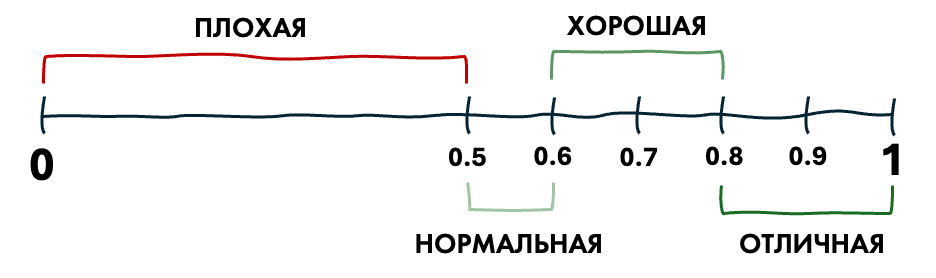

`model.rquared` - посмотреть на $R^2$ **обученной** модели `model`

In [21]:
model.rsquared

np.float64(0.556217490187467)

In [25]:
# model.summary()

У модели нормальное качество - она описывает ~50% вариации данных.

#### Среднеквадратичная ошибка ($MSE$) и Среднеабсолютная ошибка ($MAE$)

Показывают ошибку модели:

- Меняются от 0 до +∞
- Чем ближе к 0, тем лучше
- Та модель лучше, у которой MSE или MAE меньше
- МSE одной модели, можно сравнивать только MSE другой
- МAE одной модели, можно сравнивать только MAE другой


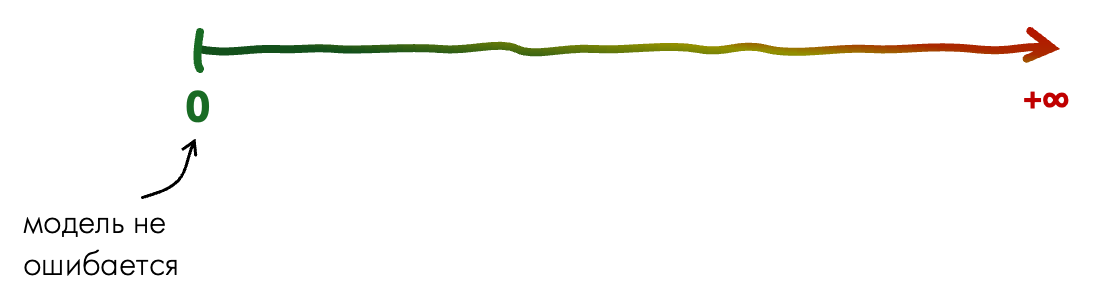

**Среднеквадратичная ошибка**:

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_i - \widehat{Y_i})^2$$

- $\Sigma$ - знак суммы, другими словами $(Y_0 - \widehat{Y_0})^2 + (Y_1 - \widehat{Y_1})^2 + ... + (Y_n - \widehat{Y_n})^2$
- $Y$ - фактические значения целевой переменной
- $\widehat{Y}$ - предсказанные значения целевой переменной `model.predict(X)`
- $n$ - количество наблюдений

In [29]:
Y_pred = model.predict(X)

sum((Y - Y_pred)**2) / Y.shape[0]

4793.579543975386

In [31]:
((Y - Y_pred)**2).mean()

np.float64(4793.579543975386)

Модель ошибается. Чтобы понять, большое это значение $MSE$ или нет, нужно сравнить модель линейной регрессии с другими моделями. С чем можно сравнивать?
- Другие модели, не линейная регрессия (не будет в курсе)
- Модели линейной регрессии, обученные на другом множестве признаков (можно добавлять / убирать / заменять признаки в $X$)
- Константное предсказание - обычно среднее или медиана. 

Сравним нашу модель с "константным" предсказанием. В качестве $\widehat{Y}$ будем использовать **среднее** значение независимой переменной. То есть для всех моделей - одно (константное) предсказание:

In [ ]:
sum((Y-Y.mean())**2) / len(Y)

MSE при константном предсказании в ~2.5 раза больше, чем MSE нашей модели. Значит наша модель хотя бы что-то из себя представляет :)

**Среднеабсолютная ошибка**:

$$MAE = \frac{1}{n} \sum_{i=1}^{n}(|Y_i - \widehat{Y_i}|)$$

- $\Sigma$ - знак суммы, другими словами $|Y_0 - \widehat{Y_0}| + |Y_1 - \widehat{Y_1}| + ... + |Y_n - \widehat{Y_n}|$
- $Y$ - фактические значения целевой переменной
- $\widehat{Y}$ - предсказанные значения целевой переменной `model.predict(X)`
- $n$ - количество наблюдений

In [36]:
(Y - Y_pred).abs().mean()

np.float64(55.279039710626094)

In [37]:
abs(Y - Y_pred).mean()

np.float64(55.279039710626094)

In [38]:
sum(abs(Y - Y_pred)) / Y.shape[0]

55.2790397106261

Модель ошибается, нужно сравнить MAE c другими модели, чтобы выбрать лучшую

## [**A11**](https://edu.hse.ru/mod/quiz/view.php?id=1220251)

### Пример-1

Аналитик Анатолий построил модель, которая предсказывает количество обращений в техническую поддержку в зависимости от количества часов, прошедших с начала рабочего дня. На графике изображена получившаяся модель (синим) и реальные данные за первую половину текущего рабочего дня (красным). Выберите верное утверждение.

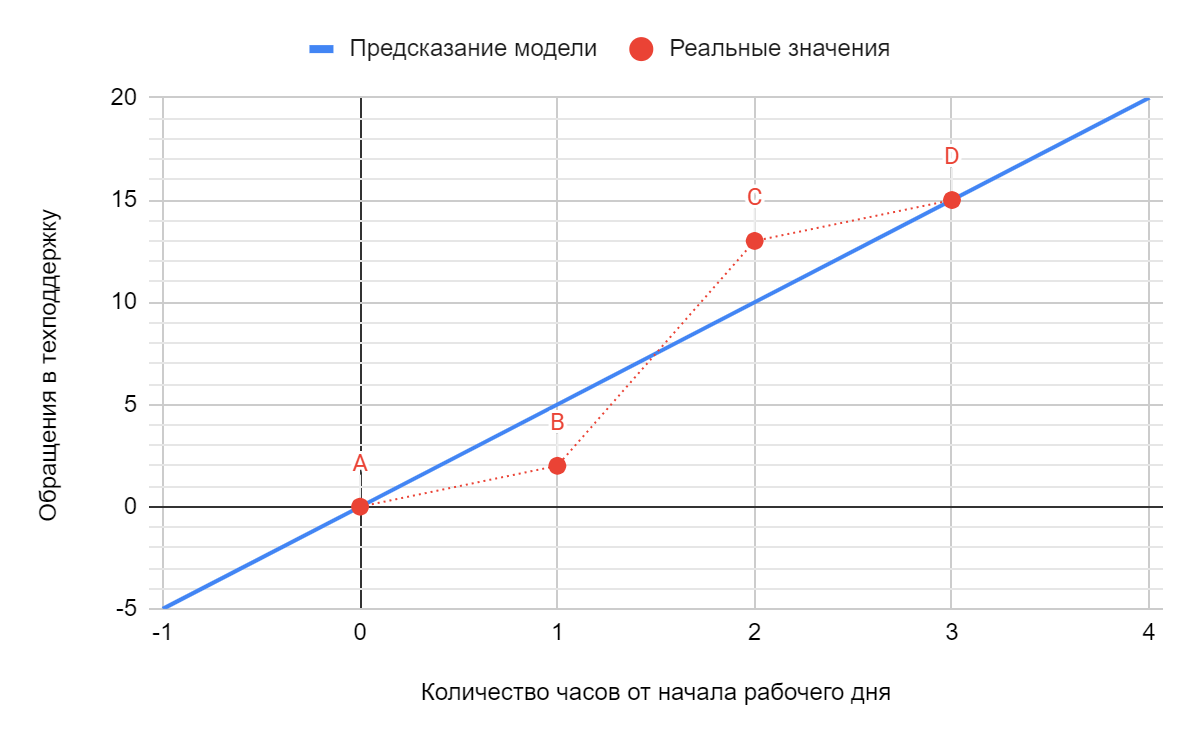

- Ошибка предсказания модели для 2 часов от начала рабочего дня меньше, чем для 0 часов от начала рабочего дня


- Среднеквадратичная ошибка равна 0


- Если просуммировать отклонения реальных значений от предсказания, получится 0


- Среднеквадратичная ошибка равна 6

### Пример-2

Исследователь Георгий построил линейную регрессию по 150 наблюдениям. Выберите верное утверждение.


- Среднеквадратичная ошибка в модели Георгия может быть больше 100


- Среднеквадратичная ошибка в модели Георгия не может превышать 150


- Среднеквадратичная ошибка в модели Георгия обязательно больше нуля


- Среднеквадратичная ошибка в модели Георгия может быть отрицательной

## [**C7**](https://edu.hse.ru/mod/quiz/view.php?id=1220259)
**Что нужно делать?** Оценивается умение рассчитать параметры однофакторной линейной регрессии

Скачиваем датасеты

In [127]:
create_url = lambda x: f'https://raw.githubusercontent.com/ksumarshmallow/Data-Analysis-Media-24/refs/heads/main/data/train{x}_C.csv'

data_C1 = pd.read_csv(create_url(1))    # датасет 1
data_C2 = pd.read_csv(create_url(2))    # датасет 2
data_C3 = pd.read_csv(create_url(3))    # датасет 3
data_C4 = pd.read_csv(create_url(4))   # датасет 4
data_C5 = pd.read_csv(create_url(5))    # датасет 5

### Датасет 1
Постройте модель линейной регрессии, которая показывает как пробег автомобиля (Mileage) оказывает влияние на стоимость автомобиля (Price). Укажите в качестве ответа произведение коэффициентов полученной регрессии. Ответ округлите до двух знаков.

### Датасет 2
Постройте модель линейной регрессии, которая показывает как размер жилой площади (sqft_living) оказывает влияние на стоимость дома (price). Укажите в качестве ответа коэффициент перед независимой переменной. Ответ округлите до двух знаков.

### Датасет 3
Постройте модель линейной регрессии, которая показывает, как температура воздуха (temperature) влияет на количество ДТП с пешеходами (pedestrian_incidents). В качестве ответа укажите значение свободного коэффициента. Ответ округлите до двух знаков.

### Датасет 4
Постройте модель линейной регрессии, которая показывает как танцевальность трека (danceability) оказывает влияние на его популярность (popularity). Укажите в качестве ответа модуль разности между полученными коэффициентами регрессии. Ответ округлите до двух знаков.

### Датасет 5
Постройте модель линейной регрессии, которая показывает как количество трасс на горнолыжном курорте (TotalSlope) оказывает влияние на стоимость билета на подъемник (DayPassPriceAdult). Укажите в качестве ответа значение коэффициента перед независимой переменной. Ответ округлите до двух знаков.

## [**C8**](https://edu.hse.ru/mod/quiz/view.php?id=1220259)
**Что нужно делать?** Умение рассчитать метрики качества линейной регрессии (MSE, MAE, R2)

### Датасет 1
Постройте модель линейной регрессии, которая показывает как пробег автомобиля (Mileage) оказывает влияние на его стоимость (Price). Укажите в качестве ответа cреднеквадратичную ошибку (MSE) полученной регрессии. Ответ округлите до двух знаков.

In [76]:
import statsmodels.api as sm

# 1. Создание независимой и целевой переменной
X = sm.add_constant(data_C1['Mileage'])
Y = data_C1['Price']

# 2. Обучение линейной регрессии
# - Позволяет оценить параметры линейной модели (С7)
# - Позволяет оценить ошибку этой линейной модели (С8)
model = sm.OLS(Y, X).fit()

# 3. оценка параметров (С7)
model.params

const      18109.868446
Mileage       -0.017451
dtype: float64

In [ ]:
# 3. Оценка ошибки (C8) - сначала предсказать значения по независимым переменным, предсказанные лиейной моделью
Y_pred = model.predict(X)

# считаем MSE
((Y - Y_pred)**2).mean()

np.float64(310794084.57128423)

### Датасет 2
Постройте модель линейной регрессии, которая показывает как размер жилой площади (sqft_living) оказывает влияние на стоимость дома (price). Укажите в качестве ответа среднеквадратичную ошибку модели (MSE). Ответ округлите до двух знаков.

### Датасет 3
Постройте модель линейной регрессии, которая показывает как температура воздуха (temperature) оказывает влияние на количество ДТП с пешеходами (pedestrian_incidents). Укажите в качестве ответа среднюю абсолютную ошибку (MAE) модели. Ответ округлите до двух знаков.

### Датасет 4
Постройте модель линейной регрессии, которая показывает как танцевальность трека (danceability) оказывает влияние на его популярность (popularity). Укажите в качестве ответа коэффициент детерминации (R2) модели. Ответ округлите до двух знаков.

### Датасет 5
Постройте модель линейной регрессии, которая показывает как количество трасс на горнолыжном курорте (TotalSlope) оказывает влияние на стоимость билета на подъемник (DayPassPriceAdult). Укажите в качестве ответа среднюю абсолютную ошибку (MAE) модели. Ответ округлите до двух знаков.